In [ ]:
import polaris as po
print(po.__version__)
import numpy as np
import pandas as pd
from rdkit import Chem
import numpy as np
import datamol as dm
from pathlib import Path
import pymol
import base64
from rdkit import Chem
from rdkit.Chem import rdFMCS
import os

from MolReBond import transfer_bond as tb

/home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.11.7


In [3]:
competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")


[2025-02-27 11:06:53] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=780414;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=719179;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.7).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=365452;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=318527;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [4]:
# competition.cache()

In [5]:
train, test = competition.get_train_test_split()

In [6]:
# Convert list of tuples to list of dictionaries
data_list = []
for data_dict, rdkit_object in train:
    data_dict['rdkit_object'] = rdkit_object
    data_list.append(data_dict)

# Convert to DataFrame
df = pd.DataFrame(data_list)

In [7]:

df_test = pd.DataFrame(test)

In [8]:
df_test['Protein Label'].value_counts()

Protein Label
SARS-CoV-2 Mpro    98
MERS-CoV Mpro      97
Name: count, dtype: int64

In [9]:
# modify the protein label SARS-CoV-2 Mpro  to SARS-CoV-2-Mpro
df_test['Protein Label'] = df_test['Protein Label'].replace('SARS-CoV-2 Mpro', 'SARS-CoV-2-Mpro')
df_test['Protein Label'] = df_test['Protein Label'].replace('MERS-CoV Mpro', 'MERS-CoV-Mpro')

In [10]:
df_test['Protein Label'].value_counts()

Protein Label
SARS-CoV-2-Mpro    98
MERS-CoV-Mpro      97
Name: count, dtype: int64

In [11]:
# show me index 187
df_test.iloc[187]

Chain B Sequence    SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...
Chain A Sequence    SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...
Protein Label                                         SARS-CoV-2-Mpro
CXSMILES            CCn1nccc1CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@...
Name: 187, dtype: object

In [12]:
# import yaml

# def create_pocket_yaml(protein_a_sequence, protein_b_sequence, ligand_smiles, output_file):
#     data = {
#         'sequences': [
#             {
#                 'protein': {
#                     'id': ['A1'],
#                     'sequence': protein_a_sequence
#                 }
#             },
#             {
#                 'protein': {
#                     'id': ['B1'],
#                     'sequence': protein_b_sequence
#                 }
#             },
#             {
#                 'ligand': {
#                     'smiles': ligand_smiles,
#                     'id': ['L1']
#                 }
#             }
#         ]
#     }

#     with open(output_file, 'w') as file:
#         yaml.dump(data, file, default_flow_style=False)

In [13]:
df_test['MOL'] = df_test['CXSMILES'].apply(Chem.MolFromSmiles)

In [14]:
df_test

,Chain B Sequence,Chain A Sequence,Protein Label,CXSMILES,MOL
0,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cn...,<rdkit.Chem.rdchem.Mol object at 0x7f5018705070>
1,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,COc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f5018705380>
2,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7f5018705540>
3,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7f50187055b0>
4,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1ccnnc1)C(=O)N(c1c...,<rdkit.Chem.rdchem.Mol object at 0x7f5018705620>
...,...,...,...,...,...
190,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,CNS(=O)(=O)OCC(=O)N[C@@H](C)c1cc(Cl)cc(-c2ccc(...,<rdkit.Chem.rdchem.Mol object at 0x7f50187a61f0>
191,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7f50187a62d0>
192,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,O=C(Cc1cncc2ccccc12)NCc1cccc(Cl)c1,<rdkit.Chem.rdchem.Mol object at 0x7f50187a6420>
193,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x7f50187a6500>


In [15]:
# # Use iterrows on df_test to create the yaml files
# for index, row in df_test.iterrows():
 
#     protein_a_sequence = row['Chain A Sequence']
#     protein_b_sequence = row['Chain B Sequence']
#     ligand_smiles = dm.to_smiles(row['MOL'])
    
#     output_file =  yaml_test_folder / f'seq_{index}.yaml'
#     print(output_file)
#     create_pocket_yaml(protein_a_sequence, protein_b_sequence, ligand_smiles, output_file)

In [16]:
source = Path("./")
train_predicted = Path("./boltz_results_train_fasta_subset/predictions")
test_predicted = Path("./boltz_results_test_fasta_old/predictions")
reference = Path("./reference_structures")
test_ligand_outputs = Path("./test_ligand_outputs")
train_ligand_outputs = Path("./train_ligand_outputs")
test_ligand_outputs_bond_fixed = Path("./test_ligand_outputs_bond_fixed")
train_ligand_outputs_bond_fixed = Path("./train_ligand_outputs_bond_fixed")


In [17]:
df['Protein Label'].value_counts()

Protein Label
SARS-CoV-2 Mpro    770
Name: count, dtype: int64

In [18]:
# rename protein label SARS-CoV-2 Mpro  to SARS-CoV-2-Mpro 
df['Protein Label'] = df['Protein Label'].replace('SARS-CoV-2 Mpro', 'SARS-CoV-2-Mpro')

In [19]:
# def create_fasta_file(df, dir_name):
#     os.makedirs(dir_name, exist_ok=True)
#     for i, row in df.iterrows():
  
#         chain_a = row['Chain A Sequence']
#         chain_b = row['Chain B Sequence']
#         chain_cx = dm.to_smiles(row['MOL'])
       
#         with open(f"{dir_name}/seq_{i}.fasta", "w") as f:
#             f.write(f">A|protein|\n{chain_a}\n")
#             f.write(f">B|protein|\n{chain_b}\n")
#             f.write(f">E|smiles\n{chain_cx}\n")
            
# create_fasta_file(df_test, "test_fasta")


In [144]:
def pymol_align(index, row, output):
    # Let's reset! Just to be sure.
    pymol.cmd.delete("all")

    # Load the reference and mobile structure
    # ref_path = reference / f"complex_{index}.pdb"
    ref_path = reference / row['Protein Label'] / "complex.pdb"
    print(ref_path)
    target_path = test_predicted / f'seq_{index}' / f'seq_{index}_model_0.cif'
    print(target_path)
    pymol.cmd.load(target_path, "predicted")
    pymol.cmd.load(ref_path, "reference")

    # Corrupt the mobile protein
    # pymol.cmd.rotate("x", 90, selection="mobile")
    # Compute the RMSD
    pymol.cmd.align(
    "chain A and predicted",
            "chain A and reference",
        quiet=1
        
        )
    
        # get rmsd
    rms2 = pymol.cmd.rms_cur("polymer and name CA and predicted",
        "polymer and name CA and reference", matchmaker=4)
    # Align the mobile protein to the reference
#     pymol.cmd.align(
#    "chain A and predicted",
#         "chain A and reference",
#     quiet=1
#     )
 
#     # get rmsd
#     rms1 = pymol.cmd.rms_cur("polymer and name CA and predicted",
#     "polymer and name CA and reference", matchmaker=4)
    
   
    print(f"RMSD: {rms2}", f"RMSD: {rms2}")
    pymol.cmd.select('ligands_predicted', 'predicted and not polymer')

  

    # Export the ligand as a Mol2 file (or any other format RDKit can read)
    pymol.cmd.save(output / f'ligand_{index}.mol2', 'ligands_predicted')
    # ret_path = "./train_complex/"+ f"my_preds_aligned_{index}.pdb"
    # ret_path_pse = "./train_complex/"+ f"my_preds_aligned_{index}.pse"
    # pymol.cmd.save(ret_path_pse)
    # pymol.cmd.save(ret_path, "predicted")

    # return  rms2
# def ligand_compare(index):
#     # Get the Reference from df
#     ref_ligand = df.iloc[index]['rdkit_object']
#     ref_ligand = Chem.RemoveHs(ref_ligand)
    
#     # Get the Predicted ligand from Pymol
#     pred_ligand = Chem.MolFromMol2File(ligand_output / f'ligand_{index}.mol2')
#     pred_ligand = Chem.RemoveHs(pred_ligand)
    
#     mols = [ref_ligand, pred_ligand]
#     mcs =rdFMCS.FindMCS(mols,threshold=0.8,completeRingsOnly=True,ringMatchesRingOnly=True)
#     # align everything to the first molecule
#     patt = Chem.MolFromSmarts(mcs.smartsString)
#     refMol = mols[0]
#     refMatch = refMol.GetSubstructMatch(patt)
    
 
#     mv = pred_ligand.GetSubstructMatch(patt)
#     rms = AllChem.CalcRMS(pred_ligand,refMol,map=[list(zip(mv,refMatch))])
#     return rms
    
    
    
  





  
    
    

In [145]:
#  do iter rows in df_test
# r1 =[]
# r2 = []
for i, row in df_test.iterrows():
    try:
        pymol_align(i, row, test_ligand_outputs)
     
    except:
        continue
    # rms = ligand_compare(i)
    # print(f"RMSD for {i} is {rms}")

reference_structures/MERS-CoV-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_0/seq_0_model_0.cif
RMSD: 4.860513687133789 RMSD: 4.860513687133789
reference_structures/MERS-CoV-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_1/seq_1_model_0.cif
RMSD: 4.8712263107299805 RMSD: 4.8712263107299805
reference_structures/SARS-CoV-2-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_2/seq_2_model_0.cif
RMSD: 10.103404998779297 RMSD: 10.103404998779297
reference_structures/MERS-CoV-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_3/seq_3_model_0.cif
RMSD: 4.88214111328125 RMSD: 4.88214111328125
reference_structures/MERS-CoV-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_4/seq_4_model_0.cif
RMSD: 4.935601711273193 RMSD: 4.935601711273193
reference_structures/SARS-CoV-2-Mpro/complex.pdb
boltz_results_test_fasta_old/predictions/seq_5/seq_5_model_0.cif
RMSD: 10.084943771362305 RMSD: 10.084943771362305
reference_structures/SARS-CoV-2-

In [20]:
r2 

NameError: name 'r2' is not defined

In [ ]:
df

,Chain B Sequence,Chain A Sequence,CXSMILES,Protein Label,rdkit_object
0,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,c1ccc(SCC[NH+]2CCOCC2)cc1,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f979179fec0>
1,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,O=C(Cc1cccc(Cl)c1)Nc1cncc2ccncc12,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f979179ccc0>
2,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVIEDM...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,C[C@@]1(C(=O)Nc2cncc3ccccc23)CNS(=O)(=O)c2ccc(...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f9791f37ec0>
3,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVINYE...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CNC(=O)C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f979179c720>
4,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICNP...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,C[NH+](C)CCOc1ccc2cncc(NC(=O)Cc3cccc(Cl)c3)c2c1,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f979179f470>
...,...,...,...,...,...
765,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,N#Cc1cncc(NC(=O)Cc2cccnc2)c1,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f9790410db0>
766,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,O=C(c1cc(=O)[nH]c(=O)[nH]1)N1CCN(c2ccc(CO)c(Cl...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f97917bc450>
767,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,O=C(Cc1cccnc1)Nc1cccc(O[C@H]2CC(=O)N2)c1,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f979047a7f0>
768,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CC(=O)N1CC[NH+](Cc2cccc(C)c2)CC1,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7f9790485300>


In [19]:
def mask_nan(y_true, y_pred):
    mask = ~np.isnan(y_true)
    y_true = np.array(y_true)[mask]
    y_pred = np.array(y_pred)[mask]
    return y_true, y_pred


def mol_has_3D(mol):
    try:
        mol.GetConformer()
    except ValueError:
        raise ValueError("Cannot get conformer for molecule, is likely 2D")

    if not mol.GetConformer().Is3D():
        raise ValueError("Molecule is not 3D")

In [20]:
from spyrmsd.molecule import Molecule
from spyrmsd.rmsd import rmsdwrapper

In [21]:
def eval_poses(preds: list[Chem.Mol], refs: list[Chem.Mol], cutoff=2.0):
    """
    Evaluate the poses of the predicted molecules against the reference molecules.

    Calculates the % correct with respect to the RMSD cutoff value.

    Parameters
    ----------
    preds : list[Chem.Mol]
        List of predicted molecules.
    refs : list[Chem.Mol]

    cutoff : float
        The cutoff value for the RMSD value. Default is 2.0.

    Returns
    -------
    Tuple[np.ndarray, float]
        Returns a tuple of the RMSD values and the percentage of RMSD values less than the cutoff

    """

    if len(preds) != len(refs):
        raise ValueError("mismatched lengths in preds vs references")

    # find symm corrected  heavy atom RMSDs
    rmsds = []
    i = 0
    for pred, ref in zip(preds, refs):
       
        # Check the input
        mol_has_3D(pred)
        mol_has_3D(ref)
        if pred.GetNumHeavyAtoms() != ref.GetNumHeavyAtoms():
            
            raise ValueError("mismatched number of atoms")

        # Compute RMSD
        
        pred_spy = Molecule.from_rdkit(pred)
        ref_spy = Molecule.from_rdkit(ref)
        print(i)
        rmsd = rmsdwrapper(ref_spy, pred_spy, symmetry=True, strip=True)
        rmsds.extend(rmsd)
        i += 1

    rmsds = np.asarray(rmsds)

    # calculate % less than cutoff
    mask = rmsds <= cutoff

    correct = sum(mask)
    prob = (correct / rmsds.shape[0]) * 100

    collect = {}
    collect["rmsd_mean"] = np.mean(rmsds)
    collect["rmsd_min"] = np.min(rmsds)
    collect["rmsd_q1"] = np.quantile(rmsds, 0.25)
    collect["rmsd_median"] = np.quantile(rmsds, 0.5)
    collect["rmsd_q3"] = np.quantile(rmsds, 0.75)
    collect["rmsd_max"] = np.max(rmsds)
    collect["rmsd_coverage"] = prob
    collect["rmsds"] = rmsds

    return collect


In [41]:
mol = []
# read all molecules in ligand output
for i in range(195):
   
        mol.append(Chem.MolFromMol2File(test_ligand_outputs / f'ligand_{i}.mol2', sanitize=False))
  
    

[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:16:36] predicted: Warnin

In [29]:
mol = []
# read all molecules in ligand output
for i in range(100):
   
        mol.append(Chem.MolFromMol2File(train_ligand_outputs / f'ligand_{i}.mol2', sanitize=False))
  

[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[11:09:05] predicted: Warnin

In [30]:
df_sub = df.iloc[:100]

In [31]:
df_sub['pred'] = mol

/tmp/ipykernel_1126325/2231128164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['pred'] = mol


In [42]:
df_test['Predicted Pose'] = mol

In [24]:
def return_clean_mol(mol):
    try:
        
        mol = Chem.MolToSmiles(mol, kekuleSmiles=False)
        
        return Chem.MolFromSmiles(mol, sanitize=False)
    except:
        return None

In [25]:
def remove_aromatic_tags(mol):
    """Remove aromatic flags from all atoms and bonds in a molecule."""
    rw_mol = Chem.RWMol(mol)
    for atom in rw_mol.GetAtoms():
        atom.SetIsAromatic(False)
    for bond in rw_mol.GetBonds():
        bond.SetIsAromatic(False)
        # bond.SetStereo(Chem.BondStereo.STEREONONE)  # Reset bond stereo
    return rw_mol.GetMol()

def transfer_bond_orders(mol1, mol2):
    # Create a copy of mol2 and kekulize it
    m2_non_aromatic = Chem.Mol(mol2)
    m2_non_aromatic = Chem.RemoveHs(m2_non_aromatic)
    Chem.Kekulize(m2_non_aromatic, clearAromaticFlags=True)
    
    # Remove aromatic tags from mol1
    mol1 = remove_aromatic_tags(mol1)
    
    # Find MCS for atom mapping
    mcs = rdFMCS.FindMCS(
        [mol1, m2_non_aromatic],
        bondCompare=rdFMCS.BondCompare.CompareAny,
        atomCompare=rdFMCS.AtomCompare.CompareElements,
        matchValences=False,
        timeout=60
    )
    
    if mcs.canceled or mcs.numAtoms != mol1.GetNumAtoms():
        raise ValueError("MCS failed to map all atoms. Check connectivity or symmetry.")
    
    mcs_pattern = Chem.MolFromSmarts(mcs.smartsString)
    matches_m1 = mol1.GetSubstructMatches(mcs_pattern)
    matches_m2 = m2_non_aromatic.GetSubstructMatches(mcs_pattern)
    
    if not matches_m1 or not matches_m2:
        raise ValueError("No substructure matches found.")

    match_m1 = matches_m1[0]
    match_m2 = matches_m2[0]
    m2_to_m1 = {m2_idx: m1_idx for m1_idx, m2_idx in zip(match_m1, match_m2)}
    
    # Prepare editable molecule from mol1
    m1_edited = Chem.RWMol(mol1)
    
    # ==== NEW: Transfer formal charges first ====
    for atom in m2_non_aromatic.GetAtoms():
        m1_idx = m2_to_m1.get(atom.GetIdx())
        if m1_idx is not None:
            m1_edited.GetAtomWithIdx(m1_idx).SetFormalCharge(atom.GetFormalCharge())
    
    # Remove existing bonds
    bonds_to_remove = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) 
                      for bond in m1_edited.GetBonds()]
    for begin, end in reversed(bonds_to_remove):
        m1_edited.RemoveBond(begin, end)
    
    # Add new bonds from mol2
    for bond in m2_non_aromatic.GetBonds():
        a2_start = bond.GetBeginAtomIdx()
        a2_end = bond.GetEndAtomIdx()
        a1_start = m2_to_m1.get(a2_start)
        a1_end = m2_to_m1.get(a2_end)
        current_num_bonds = m1_edited.GetNumBonds()
        
        if a1_start is not None and a1_end is not None:
            m1_edited.AddBond(a1_start, a1_end, bond.GetBondType())
             # Get the index of the newly added bond
        # new_bond_idx = current_num_bonds  # Bonds are 0-indexed
        
        # Only set stereo if bond exists
    #     if new_bond_idx < m1_edited.GetNumBonds():
    #         m1_edited.GetBondWithIdx(new_bond_idx).SetStereo(bond.GetStereo())

    # for atom in m2_non_aromatic.GetAtoms():
    #     if atom.GetChiralTag() != Chem.ChiralType.CHI_UNSPECIFIED:
    #         m1_idx = m2_to_m1[atom.GetIdx()]
    #         m1_edited.GetAtomWithIdx(m1_idx).SetChiralTag(atom.GetChiralTag())

    # ==== Modified sanitization ====
    # try:
    #     print(dm.same_mol(m1_edited.GetMol(), mol2))
    #     # First sanitize without property checks
    #     Chem.SanitizeMol(m1_edited, Chem.SANITIZE_ALL^Chem.SANITIZE_PROPERTIES)
    #     # Then do full sanitization
    #     Chem.SanitizeMol(m1_edited)
    #     # print if m1 and m2 are dm.same_mol
    #     print(dm.same_mol(m1_edited.GetMol(), m2_non_aromatic))
    # except Exception as e:
    #     print(f"Sanitization warning: {str(e)}")
        # # Fallback: Adjust problematic nitrogens
        # for atom in m1_edited.GetAtoms():
        #     if atom.GetAtomicNum() == 7 and atom.GetTotalValence() > 3:
        #         atom.SetFormalCharge(1)
        # Chem.SanitizeMol(m1_edited)
    
    return m1_edited.GetMol()

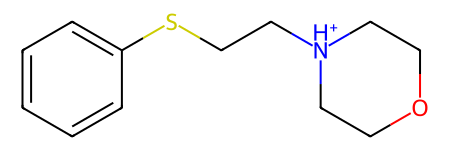

In [32]:
return_clean_mol(Chem.RemoveHs(df_sub.iloc[0]['rdkit_object']))

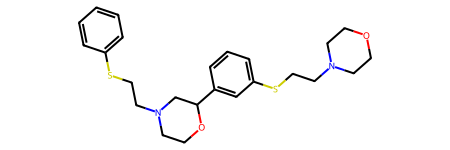

In [33]:
return_clean_mol(Chem.RemoveHs(df_sub.iloc[0]['pred']))

In [34]:
# remove the first row df sb
df_sub = df_sub.iloc[1:]

In [ ]:
df_sub['pred bf'] = df_sub.apply(lambda x: tb.transfer_bond_orders(x['pred'], x['rdkit_object']), axis=1)

In [36]:
df_sub['match bf'] = df_sub.apply(lambda x: dm.same_mol(x['rdkit_object'], x['pred bf']), axis=1)

[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:09:27] tetra

In [37]:
df_sub['match bf'].value_counts()

match bf
True     88
False    11
Name: count, dtype: int64

In [39]:
# save df_sub['pred bf] to sdf file
for i, row in df_sub.iterrows():
    Chem.MolToMolFile(row['pred bf'], train_ligand_outputs_bond_fixed / f'ligand_{i}.sdf')

In [121]:
c =eval_poses(df_sub['pred bf'], df_sub['rdkit_object'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [163]:
c

{'rmsd_mean': 11.275630973658906,
 'rmsd_min': 0.32503215273871006,
 'rmsd_q1': 0.7466237809409819,
 'rmsd_median': 2.6199698645231897,
 'rmsd_q3': 6.813016645731279,
 'rmsd_max': 63.86051424085425,
 'rmsd_coverage': 42.42424242424242,
 'rmsds': array([ 2.61996986,  0.69440703,  3.50404454,  0.88461937, 45.52279745,
         3.66938793, 47.99518926,  4.16133147, 47.83618964,  5.60288348,
         0.9087475 ,  4.49149369,  0.71433776, 46.4613424 , 46.56852331,
        47.02503195,  2.38151062,  0.76549008,  2.17068204, 45.39722534,
        45.63641471,  0.74727976,  0.57126011,  0.78743842,  0.48683824,
         0.63723265,  0.37161425, 48.25900283,  2.28720202,  3.78342202,
        15.00381256,  1.12547083,  0.63123881,  0.52347904,  0.56283426,
         0.47702264,  1.71923232,  2.95769795,  4.52544983,  0.95715708,
         0.43339723,  7.51691573, 28.20584023,  4.77229931,  1.58202442,
         4.25956963,  3.72185848, 46.73570104, 63.86051424,  0.38770505,
         0.94509611,  0.4

In [122]:
import matplotlib.pyplot as plt

In [123]:
c['rmsds']

array([ 2.61996986,  0.69440703,  3.50404454,  0.88461937, 45.52279745,
        3.66938793, 47.99518926,  4.16133147, 47.83618964,  5.60288348,
        0.9087475 ,  4.49149369,  0.71433776, 46.4613424 , 46.56852331,
       47.02503195,  2.38151062,  0.76549008,  2.17068204, 45.39722534,
       45.63641471,  0.74727976,  0.57126011,  0.78743842,  0.48683824,
        0.63723265,  0.37161425, 48.25900283,  2.28720202,  3.78342202,
       15.00381256,  1.12547083,  0.63123881,  0.52347904,  0.56283426,
        0.47702264,  1.71923232,  2.95769795,  4.52544983,  0.95715708,
        0.43339723,  7.51691573, 28.20584023,  4.77229931,  1.58202442,
        4.25956963,  3.72185848, 46.73570104, 63.86051424,  0.38770505,
        0.94509611,  0.47545819, 47.20337365,  4.46165056,  3.60518372,
        9.40995634,  1.7434989 , 48.47395401,  3.42986026,  0.46426203,
        0.7459678 ,  3.3182639 ,  2.42994749,  2.14787955,  0.73627976,
        1.15537001,  0.32503215,  7.24321389, 46.75427216, 46.68

Text(0, 0.5, 'Frequency')

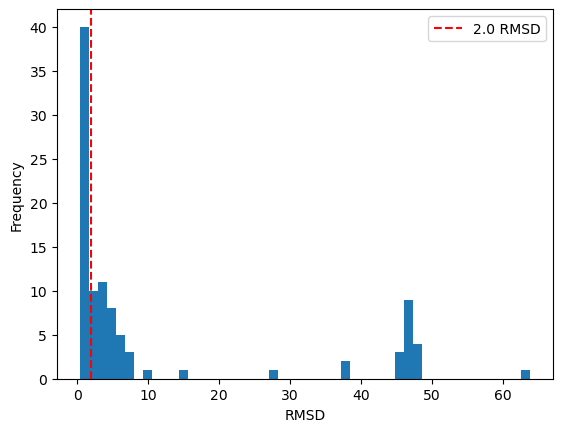

In [124]:
# show how many rmsds are below 2 and above 2
plt.hist(c['rmsds'], bins=50)
plt.axvline(x=2, color='r', linestyle='--', label='2.0 RMSD')
plt.legend()
plt.xlabel('RMSD')
plt.ylabel('Frequency')
    

Text(0, 0.5, 'Frequency')

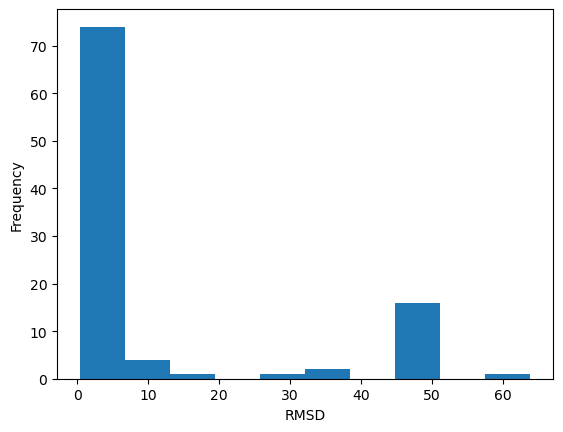

In [125]:
plt.hist(c['rmsds'])


plt.xlabel('RMSD')
plt.ylabel('Frequency')

In [632]:
n =19

In [690]:
m1 = df_sub.iloc[n]['rdkit_object']
m2 =df_sub.iloc[n]['pred']


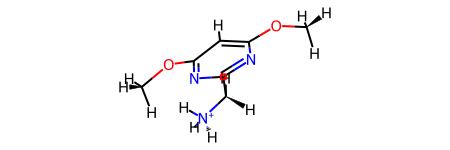

In [691]:
m1

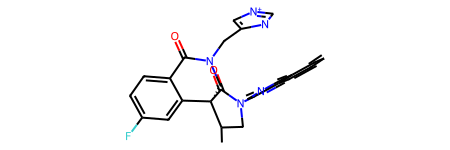

In [695]:
m2

In [692]:
dm.to_smiles(m2)

'COc1cc(OC)nc(C[N-2])n1'

In [88]:
m2 =transfer_bond_orders(m2,m1)

NameError: name 'm2' is not defined

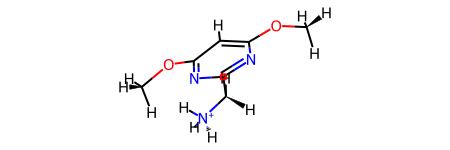

In [687]:
m1

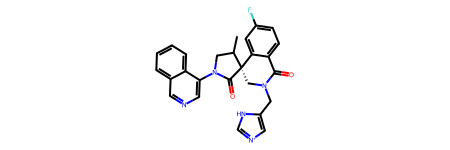

In [688]:
return_clean_mol(m2)

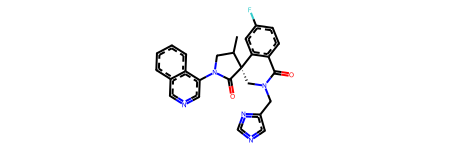

In [689]:
return_clean_mol(df_test.iloc[n]['Predicted Pose'])

In [ ]:
df_test['Predicted Pose Bond Fixed'] = df_test.apply(lambda x: tb.transfer_bond_orders(x['Predicted Pose'],x['MOL']), axis=1)

In [44]:
df_test['match'] = df_test.apply(lambda x: dm.same_mol(x['MOL'], x['Predicted Pose Bond Fixed']), axis=1)

[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[11:16:48] tetra

In [45]:
# save df_test['Predicted Pose Bond Fixed'] into sdfs
for i in range(195):
    Chem.MolToMolFile(df_test.iloc[i]['Predicted Pose Bond Fixed'], test_ligand_outputs_bond_fixed / f'ligand_{i}.sdf')

In [38]:
df_test['Random Conformer'] = df_test['MOL'].apply(lambda x: dm.conformers.generate(x, n_confs=1))

In [39]:
c =eval_poses(df_test['Predicted Pose Bond Fixed'], df_test['Random Conformer'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194


In [41]:
import matplotlib.pyplot as plt

/tmp/ipykernel_1108321/3140735348.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Frequency')

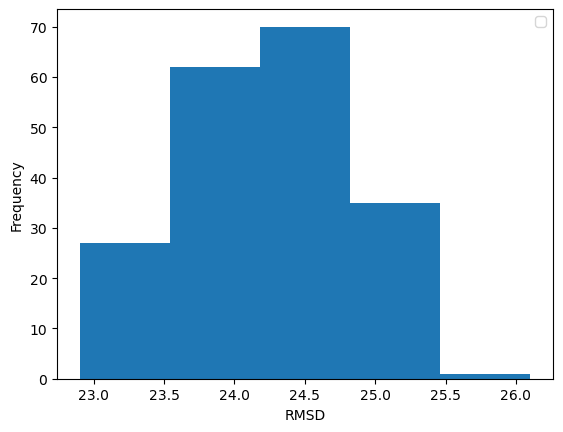

In [44]:
# show how many rmsds are below 2 and above 2
plt.hist(c['rmsds'], bins=5)
# plt.axvline(x=2, color='r', linestyle='--', label='2.0 RMSD')
plt.legend()
plt.xlabel('RMSD')
plt.ylabel('Frequency')

In [ ]:
plt.

In [153]:
df_test['match'].value_counts()

match
True     178
False     17
Name: count, dtype: int64

In [ ]:
df_test

KeyError: 'match'

In [66]:
# overwrite predicted pose bond inforation with MOL bond information


In [ ]:
df[]

In [ ]:
df_test['match'] = df_test.apply(lambda x: dm.same_mol(x['MOL'], x['Predicted Pose']), axis=1)
df_test['match'].value_counts()


[17:16:47] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[17:16:47] Can't kekulize mol.  Unkekulized atoms: 18 19 20 25 26


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 18 19 20 25 26

In [252]:
df_subset = df.iloc[:99]

In [254]:
df_subset['Predicted'] = mol

/tmp/ipykernel_906792/1158412970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Predicted'] = mol


In [48]:
df_test['Sample'] = df_test['MOL'].apply(lambda x:  dm.conformers.generate(x, n_confs=1))

In [61]:
eval_poses(df_test['Predicted Pose'], df_test['Sample'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194


{'rmsd_mean': 24.315147101079052,
 'rmsd_min': 22.30890413911456,
 'rmsd_q1': 23.84537353382538,
 'rmsd_median': 24.3517729256532,
 'rmsd_q3': 24.809173194895948,
 'rmsd_max': 27.706277940170242,
 'rmsd_coverage': 0.0}

In [154]:
def serialize_rdkit_mol(mol: Chem.Mol): 
    props = Chem.PropertyPickleOptions.AllProps
    mol_bytes = mol.ToBinary(props)
    return base64.b64encode(mol_bytes).decode('ascii')  

# y_pred_serialized = [serialize_rdkit_mol(mol) for mol in y_pred]

In [26]:
mol = []
# read all molecules in ligand output
for i in range(195):
    try:
        mol.append(Chem.MolFromMol2File(test_ligand_outputs / f'ligand_{i}.mol2', sanitize=False))
    except:
        mol.append(None)
    

[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:41] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:42] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[20:57:42] predicted: Warnin

In [261]:
sars = Chem.SDMolSupplier("minimized/sars_minimized_ligands.sdf",sanitize=False)
mers = Chem.SDMolSupplier("minimized/mers_minimized_ligands.sdf",sanitize=False)

In [262]:
# SARS-CoV-2-Mpro find indices in df _testi
s_index = df_test[df_test["Protein Label"] == "SARS-CoV-2-Mpro"].index
m_index = df_test[df_test["Protein Label"] == "MERS-CoV-Mpro"].index

In [263]:
mols_with_proper_index = {}

In [264]:
for index, molindex in enumerate(s_index):
    mols_with_proper_index[f'ligand_{molindex}'] = sars[index]

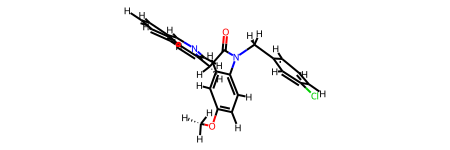

In [265]:
for index, molindex in enumerate(m_index):
    mols_with_proper_index[f'ligand_{molindex}'] = mers[index]
    
mols_with_proper_index['ligand_1']

In [267]:
# sort dictionary by key
mols_with_proper_index = dict(sorted(mols_with_proper_index.items()))

In [268]:
df_test

,Chain B Sequence,CXSMILES,Chain A Sequence,Protein Label,MOL,Predicted Pose,Predicted Pose Bond Fixed
0,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cn...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb42830b680>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281dcf20>,<rdkit.Chem.rdchem.Mol object at 0x7fb418423c30>
1,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,COc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb42830bc30>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281dd070>,<rdkit.Chem.rdchem.Mol object at 0x7fb418423bc0>
2,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428309690>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281dd1c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb418423d10>
3,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb4283097e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281dd150>,<rdkit.Chem.rdchem.Mol object at 0x7fb418423f40>
4,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1ccnnc1)C(=O)N(c1c...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428309930>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281dd230>,<rdkit.Chem.rdchem.Mol object at 0x7fb418423d80>
...,...,...,...,...,...,...,...
190,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CNS(=O)(=O)OCC(=O)N[C@@H](C)c1cc(Cl)cc(-c2ccc(...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428393ae0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281ee5e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4184bd070>
191,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428393bc0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281ee650>,<rdkit.Chem.rdchem.Mol object at 0x7fb4184bd230>
192,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,O=C(Cc1cncc2ccccc12)NCc1cccc(Cl)c1,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,MERS-CoV-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428393d10>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281ee6c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4184bd2a0>
193,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SARS-CoV-2-Mpro,<rdkit.Chem.rdchem.Mol object at 0x7fb428393df0>,<rdkit.Chem.rdchem.Mol object at 0x7fb4281ee730>,<rdkit.Chem.rdchem.Mol object at 0x7fb4184bd0e0>


In [269]:
# add a empty column to df_test
df_test['Predicted Pose'] = np.nan

In [270]:
# go through each row in df_test and add the predicted pose
for index, row in df_test.iterrows():

    df_test.at[index, 'Predicted Pose'] = mols_with_proper_index[f'ligand_{index}']

/tmp/ipykernel_1063278/4265409299.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<rdkit.Chem.rdchem.Mol object at 0x7fb41811f290>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.at[index, 'Predicted Pose'] = mols_with_proper_index[f'ligand_{index}']


In [273]:
# df_test['Predicted Pose Bf'] = df_test.apply(lambda x: transfer_bond_orders(x['Predicted Pose'],x['MOL']), axis=1) do this in for loop, i want to see the progress

for index, row in df_test.iterrows():
   
    try:
        df_test.at[index, 'Predicted Pose'] = transfer_bond_orders(row['Predicted Pose'], row['MOL'])
    except:
        print(f"Error at index {index}")
        continue

Error at index 0
Error at index 1
Error at index 2
Error at index 3
Error at index 4
Error at index 5
Error at index 6
Error at index 7
Error at index 8
Error at index 9
Error at index 10
Error at index 11
Error at index 12
Error at index 13
Error at index 14
Error at index 15
Error at index 16
Error at index 17
Error at index 18
Error at index 19
Error at index 20
Error at index 21
Error at index 22
Error at index 23
Error at index 24
Error at index 25
Error at index 26
Error at index 27
Error at index 28
Error at index 29
Error at index 30
Error at index 31
Error at index 32
Error at index 33
Error at index 34
Error at index 35
Error at index 36
Error at index 37
Error at index 38
Error at index 39
Error at index 40
Error at index 41
Error at index 42
Error at index 43
Error at index 44
Error at index 45
Error at index 46
Error at index 47
Error at index 48
Error at index 49
Error at index 50
Error at index 51
Error at index 52
Error at index 53
Error at index 54
Error at index 55
Er

In [272]:
df_test['Predicted Pose Bf'] = df_test.apply(lambda x: transfer_bond_orders(x['Predicted Pose'],x['MOL']), axis=1)

ValueError: MCS failed to map all atoms. Check connectivity or symmetry.

In [271]:
df_test['match'] = df_test.apply(lambda x: dm.same_mol(x['MOL'], x['Predicted Pose']), axis=1)

[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[23:39:55] tetra

In [31]:
df_test['match'].value_counts()

match
True     134
False     61
Name: count, dtype: int64

In [208]:
# what is iundex of all failed matches
failed_match = df_test[df_test['match'] == False]

In [209]:
failed_match['Protein Label'].value_counts()

Protein Label
MERS-CoV-Mpro      34
SARS-CoV-2-Mpro    27
Name: count, dtype: int64

In [36]:
# save the failed matches to a smi file with corresponding 
# select all failed matched with protein label SARS-CoV-2-Mpro
sars_failed_match = failed_match[failed_match['Protein Label'] == "SARS-CoV-2-Mpro"]
# save CXSMILES to a file
sars_failed_match['CXSMILES'].to_csv('sars_failed_match.smi', index=False)

In [ ]:
mars_failed_match = failed_match[failed_match['Protein Label'] == "MERS-CoV-Mpro"]
# save CXSMILES to a file
# mars_failed_match['CXSMILES'].to_csv('mars_failed_match.smi', index=False)

In [228]:
mars_failed_match['CXSMILES']

3      CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H...
10     C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC#N)C...
11     CCC(=O)[N@H+]1CCCc2c(N(Cc3cccc(Cl)c3)C(=O)Cc3c...
24     C[C@H]1C[NH+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc4...
32     C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@@...
33     C[C@H]1C[N@H+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc...
35      C[C@H]1C[C@H](c2ccccc2)N(C(=O)Cc2cncc3ccccc23)C1
40     O=C(C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc3cc...
44     C[C@H]1C[N@@H+](CCN2C[C@@]3(C(=O)N(c4cncc5cccc...
47     C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@...
54     O=C1N[C@]2(C[C@H](c3ccccc3Cl)C2)C(=O)N1c1cncc2...
56     CC[C@H]1C[C@@H](C(F)(F)F)CCN1C(=O)Cc1cncc2ccccc12
57     C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@...
58     C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@...
61     C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@H...
68     N#CCc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23...
75     C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@...
92     CNC(=O)CN1C[C@@]2(C(=O)N

In [229]:
df_test[(df_test['Protein Label'] == "MERS-CoV-Mpro") & (df_test['match'] == False)]['CXSMILES']

185    O=C(Cc1cncc2ccccc12)N1C=CC=CC=C[C@H]1c1ccccc1
Name: CXSMILES, dtype: object

In [51]:
def fix_unmatched(p0_file,p1_file, protein,rm,rn):
    # read a sdf file
    sars_p0 = Chem.SDMolSupplier(p0_file,sanitize=False)
    sars_p1 = Chem.SDMolSupplier(p1_file,sanitize=False)

    # create a pandas df with sars_p0 name and LF dg
    sars_p0_df = pd.DataFrame()
    sars_p0_df['name'] = [mol.GetProp('_Name') for mol in sars_p0]
    sars_p0_df['LF dg'] = [mol.GetProp('LF dG') for mol in sars_p0]
    sars_p0_df['Structure_p0'] = [mol for mol in sars_p0]

    # create a pandas df with sars_p0 name and LF dg
    sars_p1_df = pd.DataFrame()
    sars_p1_df['name'] = [mol.GetProp('_Name') for mol in sars_p1]
    sars_p1_df['LF dg'] = [mol.GetProp('LF dG') for mol in sars_p1]
    sars_p1_df['Structure_p1'] = [mol for mol in sars_p1]


    sars_p1_df = sars_p1_df.sort_values(by='name')
    sars_p1_df = sars_p1_df.rename(columns={'LF dg': 'LF dg p1'})
    sars_p1_df['name'] = sars_p1_df['name'].str[:-rn]

    sars_p0_df = sars_p0_df.sort_values(by='name')
    sars_p0_df = sars_p0_df.rename(columns={'LF dg': 'LF dg p0'})


    # merge sars_p0_df and sars_p1_df by name and reset index
    sars_merged = pd.merge(sars_p0_df, sars_p1_df, on='name').reset_index(drop=True)
    sars_merged['better_pocket'] = np.where(sars_merged['LF dg p0'] > sars_merged['LF dg p1'], 'p0', 'p1')
    sars_merged['final_structure'] = np.where(sars_merged['LF dg p0'] > sars_merged['LF dg p1'], sars_merged['Structure_p0'], sars_merged['Structure_p1'])
    # in name of sars_merged , remove _D and sars_failed_match:
    sars_merged['name'] = sars_merged['name'].str.replace('_D', '')
    sars_merged['name'] = sars_merged['name'].str.replace(rm, '')
    sars_merged['name'] = sars_merged['name'].apply(int)
    sars_merged = sars_merged.sort_values(by='name')

    # find the index of failed matches in df_test that are SARS-CoV-2-Mpro
    sars_failed_match_index = df_test[(df_test['Protein Label'] == protein) & (df_test['match'] == False)].index
    sars_merged['key'] = sars_failed_match_index

    df_test['Predicted Pose Copy'] = df_test['Predicted Pose']

    # go through sars_merged, the key is the index of failed matches in df_test and replace MOL with final_structure
    for index, row in sars_merged.iterrows():
        df_test.at[row['key'], 'Predicted Pose'] = row['final_structure']
        
    df_test['match'] = df_test.apply(lambda x: dm.same_mol(x['MOL'], x['Predicted Pose']), axis=1)

In [52]:
# index of all match = false for SARS-CoV-2-Mpro
df_test[(df_test['Protein Label'] == "SARS-CoV-2-Mpro") & (df_test['match'] == False)].index

Index([ 12,  18,  19,  22,  25,  31,  36,  49,  50,  52,  77,  78,  88,  89,
        95, 108, 111, 115, 127, 136, 138, 142, 155, 170, 171, 175, 194],
      dtype='int64')

In [53]:
fix_unmatched("docked_flare_pocket_0.sdf", "docked_flare_pocket_1.sdf", "SARS-CoV-2-Mpro",'sars_failed_match:',2)

[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:43] tetra

In [54]:
fix_unmatched("docked_flare_pocket_0_mers.sdf", "docked_flare_pocket_1_mers.sdf", "MERS-CoV-Mpro",'mars_failed_match:',4)

[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.
[21:22:44] tetra

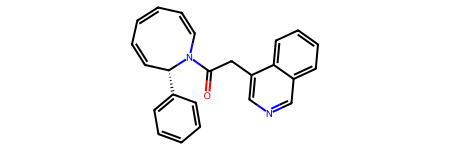

In [55]:
df_test[(df_test['Protein Label'] == "MERS-CoV-Mpro") & (df_test['match'] == False)]['MOL'].values[0]

In [56]:
p =df_test[(df_test['Protein Label'] == "MERS-CoV-Mpro") & (df_test['match'] == False)]['Predicted Pose'].values[0]

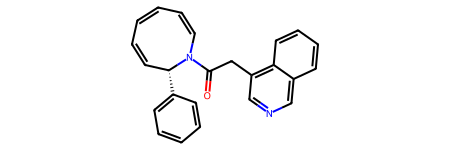

In [57]:

Chem.MolFromSmiles(Chem.MolToSmiles(p))

In [58]:
dm.same_mol(p,df_test[(df_test['Protein Label'] == "MERS-CoV-Mpro") & (df_test['match'] == False)]['MOL'].values[0])

False

In [59]:
dm.to_inchikey(p)

'MCCGVVMSKBCSRH-IGXKNELUSA-N'

In [240]:
dm.to_inchikey(df_test[(df_test['Protein Label'] == "MERS-CoV-Mpro") & (df_test['match'] == False)]['MOL'].values[0])

'MCCGVVMSKBCSRH-QHCPKHFHSA-N'

In [60]:
df_test[df_test['match'] == False]

,CXSMILES,Protein Label,Chain B Sequence,Chain A Sequence,Predicted Pose,MOL,match,Sample,Predicted Pose Copy
185,O=C(Cc1cncc2ccccc12)N1C=CC=CC=C[C@H]1c1ccccc1,MERS-CoV-Mpro,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA...,<rdkit.Chem.rdchem.Mol object at 0x7f8b745a1380>,<rdkit.Chem.rdchem.Mol object at 0x7f8b752a3f40>,False,<rdkit.Chem.rdchem.Mol object at 0x7f8b746f1460>,<rdkit.Chem.rdchem.Mol object at 0x7f8b804e70d0>


In [181]:
index

194

In [188]:
df_test.iloc[index]['CXSMILES']

'C[C@@H]1COC[C@@]2(C1)NC(=O)N(c1cncc3ccccc13)C2=O'

In [ ]:
# save 

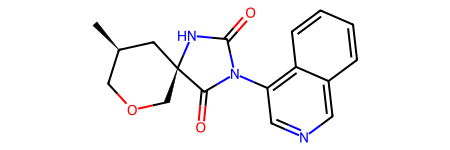

In [155]:
y_pred_serialized = [serialize_rdkit_mol(mol) for mol in df_test['Predicted Pose Bond Fixed'].values]

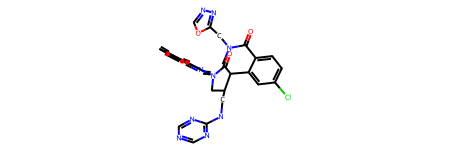

In [156]:
deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[0].encode("ascii")))
deserialized

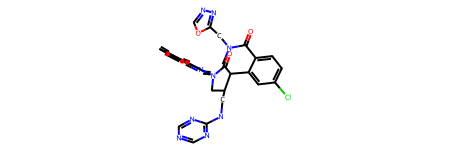

In [157]:
df_test['Predicted Pose Bond Fixed'][0]

In [158]:
dm.same_mol(df_test['Predicted Pose Bond Fixed'][0], deserialized)

[02:02:36] tetrahedral chirality on atom with <3 or >4 neighbors will be ignored.


True

In [159]:
df_test['ref heavy atoms'] = df_test['MOL'].apply(lambda x: x.GetNumHeavyAtoms())
df_test['pred heavy atoms'] = df_test['Predicted Pose Bond Fixed'].apply(lambda x: x.GetNumHeavyAtoms())


In [160]:
df_test['num heavy atomns diff'] = df_test['ref heavy atoms'] - df_test['pred heavy atoms']

In [161]:
df_test['num heavy atomns diff'] = df_test['num heavy atomns diff'].astype(int)
df_test['num heavy atomns diff'].value_counts()

num heavy atomns diff
0    195
Name: count, dtype: int64

In [162]:
competition.submit_predictions(
    predictions=y_pred_serialized,
    prediction_name="Pose-Prediction-Intermediate-2-Fixed-Alignment-Issue",
    prediction_owner="auro",
    report_url="https://www.example.com", 
    # The below metadata is optional, but recommended.
    # github_url="https://github.com/polaris-hub/polaris",
    description="Apologies, the last submission had alignment mistake. I am now following the latest alignment updates. Please consider this as my final intermediate leaderboard submission.",
    # tags=["tutorial"],
    # user_attributes={"Framework": "RDKit", "Method": "Dummy Baseline"}
)

/home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[02:03:55]  Success: Submitting competition predictions                                               ]8;id=719755;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=706559;file:///home/s1905547/.conda/envs/boltzswan/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

In [69]:
# move the first ligand_i files from train_fasta to anothr folder
for i in range(100):
    try:
        os.rename( f'train_fasta/seq_{i}.fasta',  f'train_fasta_subset/seq_{i}.fasta')
    except:
        print(f"file {i} not found")